# Training Cyrillic letter CNN with Pytorch

In [1]:
import pandas as pd
df = pd.read_csv("train.csv").append(pd.read_csv('test.csv'))

/tmp/ipykernel_485668/3392715614.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = pd.read_csv("train.csv").append(pd.read_csv('test.csv'))


In [2]:
df

,filename,letters81,merged53,unbalanced42class,balanced42,Russian
0,25_25_339_20190729091515.png,67,25,25,25.0,20.0
1,20_38_200_20190729104200.png,20,20,20,20.0,-1.0
2,23_23_1151_20190729091009.png,65,23,23,23.0,18.0
3,33_33_983_20190729110743.png,33,33,33,33.0,25.0
4,27_27_747_20190729105344.png,27,27,27,27.0,-1.0
...,...,...,...,...,...,...
12119,28_28_235_20190729092115.png,70,28,28,-1.0,21.0
12120,24_24_1533_20190729104912.png,24,24,24,-1.0,19.0
12121,26_26_943_20190729105224.png,26,26,26,-1.0,-1.0
12122,1_1_307_20190729081712.png,43,1,1,-1.0,-1.0


## Load and Visualize data

In [3]:
dfcut = df.query(f'Russian > -1 and Russian == 1 and  letters81 > 41')

In [4]:
len(dfcut)

1657

In [5]:
labels = ['А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ё', 'Ж', 'З', 'И', 'Й',
          'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф',
          'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я']

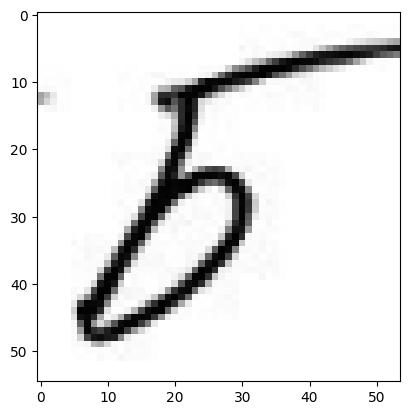

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
files = dfcut['filename'].values
file = random.choice(files)

img = mpimg.imread(f'allrgb/{file}')

plt.imshow(img)

In [7]:
!ls 

/bin/bash: /home/sutclw/anaconda3/envs/torch/lib/libtinfo.so.6: no version information available (required by /bin/bash)
 01-DCGANS.ipynb
 01-MNIST-with-CNN.ipynb
 03-Loading-Real-Image-Data.ipynb
 04-CNN-on-Custom-Images.ipynb
'13. PyTorch Pretrained Models - 1 - VGG16, ResNet, Inceptionv3, MobileNetv2, SqueezeNet, WideResNet and MNASNet.ipynb'
'1. PyTorch CNN Tutorial MNIST.ipynb'
'23. PyTorch Transfer Learning and Fine Tuning.ipynb'
'24. PyTorch - Feature Extraction CNN.ipynb'
'32. PyTorch - Generative Adversial Networks - GAN - MNIST.ipynb.ipynb'
'38. PyTorch Siamese Networks Face Similarity.ipynb'
'4. PyTorch Misclassifications and Model Performance Analysis.ipynb'
'8. PyTorch - Fashion-MNSIT Part 2 - With Regularisation.ipynb.ipynb'
 allbi
 allgr
 allrgb
 app_imageА.png
 app_imageБ.png
 app_imageВ.png
 app_imageГ.png
 app_imageД.png
 app_imageЕ.png
 app_imageЙ.png
 app_imageЛ.png
 app_imageН.png
 app_imageП.png
 app_imageР.png
 app_imageС.png
 app_imageТ.png
 app_imageХ.png
 app_

In [10]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

df = pd.read_csv("train.csv")
dfrussian = df.query('Russian > -1 and letters81 <= 41 and Russian == 1')
X = np.zeros((len(dfrussian), 32,32,3))
y = np.zeros((len(dfrussian),1))
dfrussian = dfrussian.reset_index()
for index, row in dfrussian.iterrows():
    img = Image.open(f'allrgb/{row["filename"]}')
    img = img.resize((32,32))
    #print(img.shape)
    #plt.imshow(img)
    plt.show()
    X[index] = np.array(img)/255.
    if row['letters81'] > 41:
        y[index]  = row['Russian']+33
    else:
        y[index]  = row['Russian']
    

In [11]:
X2 = np.mean(X,axis=3)
X3=1-X2

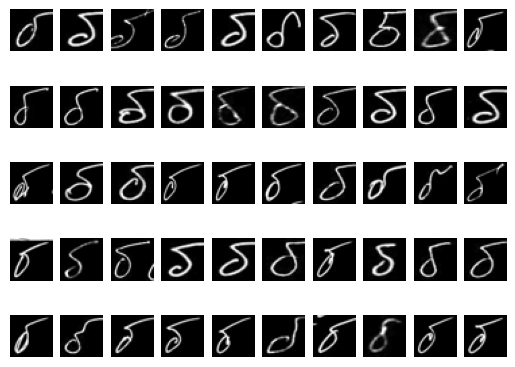

In [12]:
# Let's view the 50 first images of the MNIST training dataset
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(X2[index]*255., cmap='gray_r')

In [13]:
X2 = np.mean(X,axis=3)
X3=1-X2

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     np.expand_dims(X3,1), y.flatten(), test_size=0.2, random_state=42)

In [18]:
train_data = TensorDataset( torch.tensor(X_train,dtype=torch.float), torch.tensor(y_train,dtype=torch.int64) ) 

In [19]:
test_data = TensorDataset(torch.tensor(X_test,dtype=torch.float), torch.tensor(y_test,dtype=torch.int64))

In [20]:
len(train_data)

1036

In [21]:
batch_size = 32

train_loader = DataLoader(train_data, batch_size=32, shuffle=True,pin_memory=True)
test_loader = DataLoader(test_data, shuffle=False, pin_memory=True)

In [22]:
diter = iter(train_loader)

## Visualize data

(3, 138, 274)


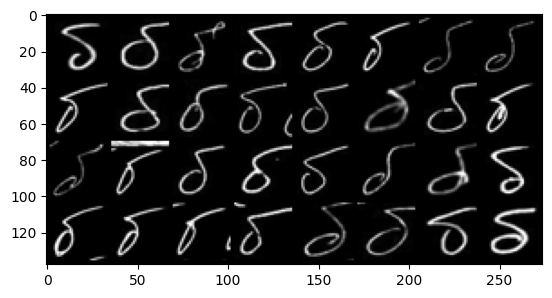

11111111111111111111111111111111


In [23]:
import torchvision

import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img   
    npimg = img.numpy()
    print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(''.join('%1s' % labels[j].numpy() for j in range(32)))

In [24]:
if torch.cuda.is_available():
  device = 'cuda' 
else:
  device = 'cpu' 

In [25]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(

            nn.Linear(1024, 2048),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 1024)
        output = self.model(x)
        return output


discriminator = Discriminator().to(device=device)

In [26]:

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 32,32)
        return output

generator = Generator().to(device=device)

In [39]:

lr = 0.00001
epochs = 50
loss_function = nn.BCELoss()


optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [41]:
for epoch in range(epochs):
    for n, (samples, labels) in enumerate(train_loader):

        real_samples = samples.to(device=device)
        batch_size = real_samples.size(0)
        real_samples_labels = torch.ones((batch_size, 1)).to(device=device)
        latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)
        all_samples = torch.cat((real_samples, generated_samples))

        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))


        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)

        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        latent_space_samples = torch.randn((batch_size, 100)).to(device=device)

  
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()


        if n == batch_size - 1:
            print(f"Epoch: {epoch} Descrimianted Loss: {loss_discriminator}")
            print(f"Epoch: {epoch} Generator Loss: {loss_generator}")

Epoch: 0 Descrimianted Loss: 0.0004944346728734672
Epoch: 0 Generator Loss: 11.977437973022461
Epoch: 1 Descrimianted Loss: 4.1271243389928713e-05
Epoch: 1 Generator Loss: 12.817666053771973
Epoch: 2 Descrimianted Loss: 0.0007132720202207565
Epoch: 2 Generator Loss: 10.91220474243164
Epoch: 3 Descrimianted Loss: 0.002574168611317873
Epoch: 3 Generator Loss: 11.875004768371582
Epoch: 4 Descrimianted Loss: 0.00014716606528963894
Epoch: 4 Generator Loss: 10.871089935302734
Epoch: 5 Descrimianted Loss: 0.0001827352389227599
Epoch: 5 Generator Loss: 11.685811042785645
Epoch: 6 Descrimianted Loss: 0.00020685256458818913
Epoch: 6 Generator Loss: 11.768020629882812
Epoch: 7 Descrimianted Loss: 6.0232283431105316e-05
Epoch: 7 Generator Loss: 10.369680404663086
Epoch: 8 Descrimianted Loss: 4.029579577036202e-05
Epoch: 8 Generator Loss: 10.002090454101562
Epoch: 9 Descrimianted Loss: 5.4000360250938684e-05
Epoch: 9 Generator Loss: 10.205789566040039
Epoch: 10 Descrimianted Loss: 9.620446508051828

In [42]:
batch_size=16



In [43]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)

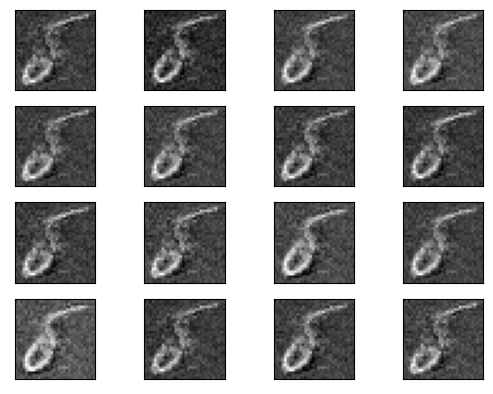

In [44]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(32, 32), cmap="gray")
    plt.xticks([])
    plt.yticks([])

In [94]:
generated_samples.shape

torch.Size([16, 1, 32, 32])